# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
## Seção 7.4: Bancos de filtros multiestágios

In [59]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import pywt
from ipywidgets import Dropdown, interactive

### Aplicação reiterada de bancos de filtros

A transformada definida por

$$x\mapsto (X_l,X_h) = \left(D(l_a*x),D(h_a*x)\right)$$

pode ser iterada a fim de ganhar novas perspectivas sobre o sinal e novas possibilidades de processamento.

A aplicação *reiterada* ou *encaixada* do banco de filtros pode ser feita recodificando os sinais $X_l$ e/ou $X_h$ através do mesmo processo: filtragem e subamostragem

### Aplicação reiterada em todos os canais

Se decidirmos recodificar tanto $X_l$ quanto $X_h$, através das transformações

$$\begin{array}{l}
X_l\mapsto (X_{ll},X_{lh}) = \left(D(l_a*X_l),D(h_a*X_l)\right)\\
X_h\mapsto (X_{hl},X_{hh}) = \left(D(l_a*X_h),D(h_a*X_h)\right)
\end{array}$$

teremos a teoria dos *pacotes wavelet* (*wavelet packets*). A transformada completa em dois estágios será

$$x\mapsto(X_{ll},X_{lh},X_{hl},X_{hh}).$$

Graficamente, podemos representar o banco de filtros completo em dois estágios como
$$x\longrightarrow\begin{array}{|l}
\longrightarrow\fbox{$\ \ l_a\,\ \ $}\longrightarrow\fbox{$\ \ D\ \ $}\longrightarrow X_l\,
\longrightarrow\begin{array}{|l}
\longrightarrow\fbox{$\ \ l_a\,\ \ $}\longrightarrow\fbox{$\ \ D\ \ $}\longrightarrow\\
\longrightarrow\fbox{$\ \ h_a\ \ $}\longrightarrow\fbox{$\ \ D\ \ $}\longrightarrow
\end{array}\\
\rule{0mm}{0mm}\\
\longrightarrow\fbox{$\ \ h_a\ \ $}\longrightarrow\fbox{$\ \ D\ \ $}\longrightarrow X_h
\longrightarrow\begin{array}{|l}
\longrightarrow\fbox{$\ \ l_a\,\ \ $}\longrightarrow\fbox{$\ \ D\ \ $}\longrightarrow\\
\longrightarrow\fbox{$\ \ h_a\ \ $}\longrightarrow\fbox{$\ \ D\ \ $}\longrightarrow
\end{array}
\end{array}\left[\begin{array}{c}
\rule{0mm}{2.5ex}\fbox{$X_{ll}$}\\
\rule{0mm}{2.5ex}\fbox{$X_{lh}$}\\
\rule{0mm}{5.5ex}\fbox{$X_{hl}$}\\
\rule{0mm}{2.5ex}\fbox{$X_{hh}$}
\end{array}\right]$$

### Aplicação reiterada apenas nos coeficientes de aproximação ($X_l$)

A teoria de **wavelets** prevê a aplicação reiterada ou encaixada do banco de filtros apenas no canal de baixas frequências em cada estágio:

$$x\longrightarrow\begin{array}{|l}
\longrightarrow\fbox{$\ \ l_a\,\ \ $}\longrightarrow\fbox{$\ \ D\ \ $}\longrightarrow X_l\,
\longrightarrow\begin{array}{|l}
\longrightarrow\fbox{$\ \ l_a\,\ \ $}\longrightarrow\fbox{$\ \ D\ \ $}\longrightarrow\\
\longrightarrow\fbox{$\ \ h_a\ \ $}\longrightarrow\fbox{$\ \ D\ \ $}\longrightarrow
\end{array}\\
\rule{0mm}{0mm}\\
\longrightarrow\fbox{$\ \ h_a\ \ $}\longrightarrow\fbox{$\ \ D\ \ $}\ \rule[0.44ex]{6.7cm}{0.7pt}\!\!\longrightarrow
\end{array}\left[\begin{array}{c}
\rule{0mm}{2.5ex}\fbox{$X_{ll}$}\\
\rule{0mm}{2.5ex}\fbox{$X_{lh}$}\\
\rule{0mm}{5.5ex}\fbox{$X_{h}$}
\end{array}\right]$$

Isso equivale à transformada

$$x\mapsto(X_{ll},X_{lh},X_{h})=\left(\underbrace{D(l_a*\overbrace{D(l_a*x)}^{X_l})}_{X_{ll}},\underbrace{D(h_a*\overbrace{D(l_a*x)}^{X_l})}_{X_{lh}},D(h_a*x)\right),$$

cuja inversa depende da aplicação também em dois estágios das operações de *superamostragem* e *filtragem*, ou seja, a transformada inversa $(X_{ll},X_{lh},X_{h})\mapsto x$ é dada por

$$x = l_s*U\left(\overbrace{l_s*U(X_{ll})+h_s*U(X_{lh})}^{X_l}\right)+h_s*U(X_h).$$

### Transformada em mais de dois estágios

O processo acima pode ser generalizado para $M$ estágios, sempre recodificando o canal de baixas frequências obtidos no estágio anterior:

$$x\mapsto
\left[\begin{array}{c}
\fbox{$X_{l}$}\\
X_{h}
\end{array}\right]\mapsto
\left[\begin{array}{c}
\fbox{$X_{ll}$}\\
X_{lh}\\
X_{h}
\end{array}\right]\mapsto
\left[\begin{array}{c}
\fbox{$X_{lll}$}\\
X_{llh}\\
X_{lh}\\
X_{h}
\end{array}\right]\mapsto
\left[\begin{array}{c}
\fbox{$X_{llll}$}\\
X_{lllh}\\
X_{llh}\\
X_{lh}\\
X_{h}
\end{array}\right]\mapsto\cdots$$

onde após $M$ aplicações teremos uma componente $X_{\underbrace{ll\cdots l}_{M}}$ e $M$ componentes da forma $X_{\underbrace{ll\cdots l}_{L}h}$ para $L=M-1,M-2,\ldots,0$.

A decodificação deve ser realizada também em $M$ etapas, seguindo a sequência acima na direção oposta.

### Exemplo 7.6

Considere outra vez o sinal do exemplo 7.2:

$$x(t) = \left\{\begin{array}{ll}
\sin(2\pi 12 t),&0\le t<t_1\\
0.8,&t_1\le t<t_2\\
0.3,&t_2\le t<t_3\\
0,&t_3\le t<1
\end{array}\right.$$

onde $0<t_1<t_2<t_3<1$.

Consideraremos sua codificação em até 4 estágios pelo banco de filtros ortogonal da Haar, ou seja, usando

$$\begin{array}{llrcccl}
l&=&(\ldots,0,&0,&\overbrace{\frac{\sqrt{2}}{2}}^{\small n=0},&\frac{\sqrt{2}}{2},&0,\ldots)\\
h&=&(\ldots,0,&0,&\frac{\sqrt{2}}{2},&-\frac{\sqrt{2}}{2},&0,\ldots)
\end{array}$$

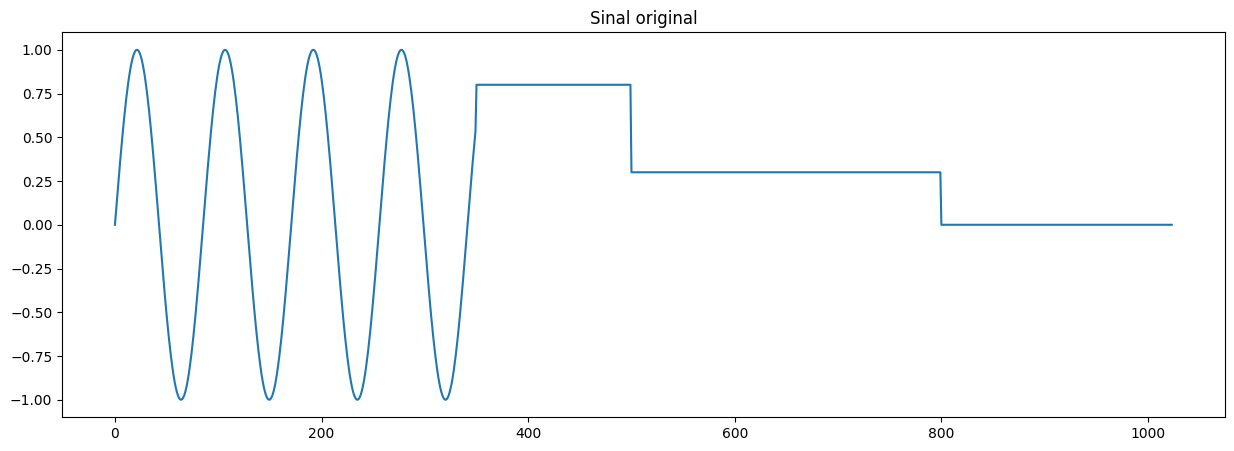

In [60]:
N = 1024;
x = np.zeros(1024);
x[0:350] = np.sin(2 * m.pi * 12 *  np.arange(0, 1, 1/N)[:350]) 
x[350:500] = 0.8 * np.ones(150);
x[500:800] = 0.3 * np.ones(300)
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(x);ax.set_title("Sinal original");
plt.show()

In [61]:
from numpy.fft import fft,ifft

# convolução circular
def cconv(x,h):    # considera que |h|<=|x|
    hpad = np.zeros(len(x))
    hpad[:len(h)] = h
    return np.real(ifft(fft(x)*fft(hpad)))

# DWT ortogonal de Haar com M estágios
# Obs: essa mesma implementação serve para outros bancos de filtros, sendo que, se 
# forem causais, apenas as duas linhas que definem la e ha precisam ser alteradas.
# Se os filtros não forem causais, será necessário fazer um shift circular das saídas
# das convoluções usando a função np.roll(..., -L), onde L é o número de coeficientes
# do filtro com índices negativos.
def dwt_haar(x, M=1):
    # filtros de análise de Haar (definidos para n=0,1)
    c = m.sqrt(2)/2
    la = np.array([c, c]) # filtro passa-baixas
    ha = np.array([c, -c]) # filtro passa-altas
    # inicializa vetor X de saída com uma cópia de x
    N = len(x)
    X = np.ndarray(np.shape(x))
    X[:] = x
    # em cada estágio j, codificaremos o vetor
    # y = X_{ll...l} = coefs de aproximação do estágio anterior
    for j in range(M):
        y = X[:N] # seleciona o trecho a codificar
        X[:N//2] = cconv(y,la)[::2] # Xl = D(x*l)
        X[N//2:N] = cconv(y,ha)[::2] # Xh = D(x*h)
        N = N//2 # próximo estágio processará metade do vetor
    return X

# IDWT ortogonal de Haar com M estágios
# Obs: essa mesma implementação serve para outros bancos de filtros. Para o banco
# de filtros de Haar, cada filtro de síntese possui L=1 coeficientes com índices
# negativos, e por isso as saídas das convoluções são corrigidas por um shift
# circular usando a função np.roll(..., -L).
def idwt_haar(X, M=1):
    # filtros de síntese de Haar (definidos para n=-1,0)
    c = m.sqrt(2)/2
    ls = np.array([ c, c ]) # filtro passa-baixas
    hs = np.array([ -c, c ]) # filtro passa-altas
    # inicializa vetor x da saída
    x = X.copy()
    # começa a reconstrução do último nível
    n = len(X)//2**M
    for j in range(M,0,-1):
        # coeficientes de aproximação e detalhes do nível j
        cA, cD = x[:n], x[n:2*n]
        # superamostragem
        UXl = np.zeros(2*n); UXl[::2] = cA
        UXh = np.zeros(2*n); UXh[::2] = cD
        # filtragem (a função np.roll ajusta o shift dos filtros de síntese)
        vl, vh = np.roll(cconv(UXl, ls), -1), np.roll(cconv(UXh, hs), -1)
        x[:2*n] = vl+vh # combina canais
        n = n*2 # próximo nível terá o dobro dos coeficientes
    return x

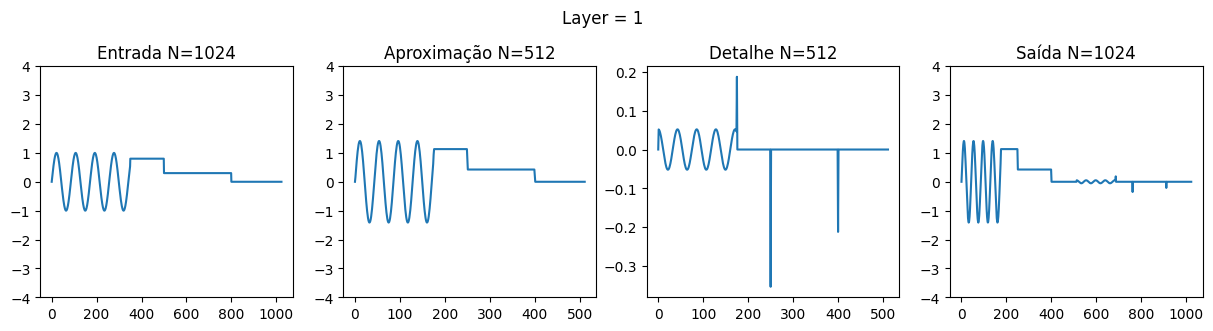

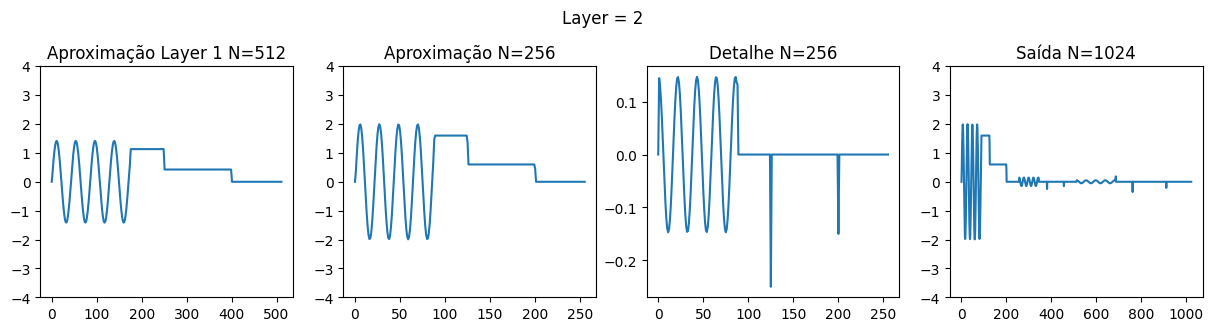

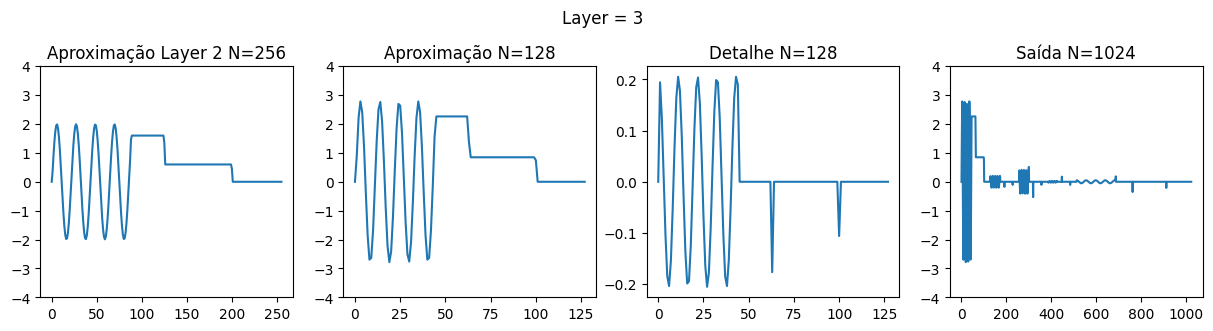

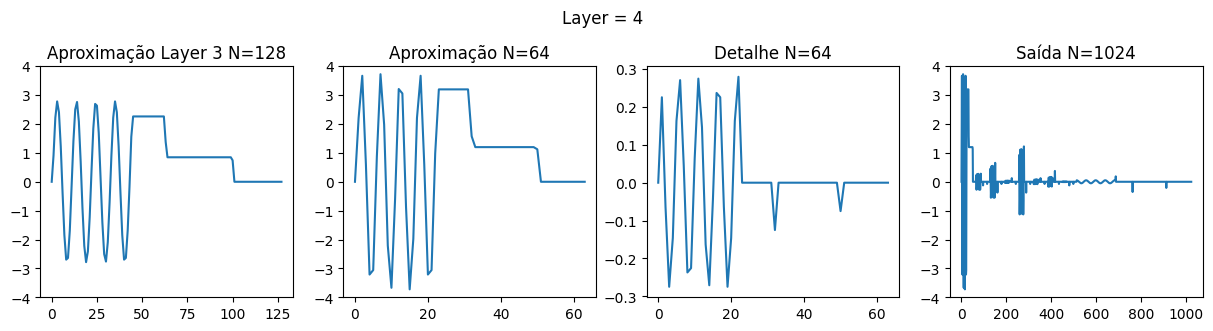

In [164]:
import math
from scipy.fft import fft,ifft

# essa versão aceita x e h de tamanhos diferentes.
# e aproveita que h é menor para iterar menos vezes
# nesse caso utilizando apenas números reais
def conv_circular(x, h):
    N = len(x)
    MM = len(h)
    #w = np.zeros(N, dtype='complex')
    w = np.zeros(N)
    for k in range(N):
        for m in range(MM):
            w[k] += h[m] * x[k-m]
    return w

def downsample(x): return x[0:len(x):2]

def upsample(x): return np.concatenate([np.insert(x, slice(1, None), 0), np.zeros(1)])

# minha implementação
def my_dwt_haar(x, layers=1):
    # filtros ortogonais
    constante = np.sqrt(2)/2
    l_analysis = np.array([constante, constante])
    h_analysis = np.array([constante, -constante])
    
    Xh = conv_circular(x, h_analysis)
    Xh_condensed = downsample(Xh)
    
    Xl = conv_circular(x, l_analysis)
    Xl_condensed = downsample(Xl)
    


    X = np.concatenate([Xl_condensed, Xh_condensed])
    
    # só entra se houver mais de uma camada
    for layer in range(1, layers):
        Xll = conv_circular(Xl_condensed, l_analysis)
        Xll_condensed = downsample(Xll)

        Xlh = conv_circular(Xl_condensed, h_analysis)
        Xlh_condensed = downsample(Xlh)
        
        Xl_condensed = np.concatenate([Xll_condensed, Xlh_condensed])
        
        
        X[0:len(Xl_condensed)] = Xl_condensed
        
    return X



    
def my_coeficientes_etapa(x, layer):
    fig,axes = plt.subplots(1,4, figsize=(15, 3))
    
    plt.suptitle(f'Layer = {layer}', y=1.07)
    
    resultado = my_dwt_haar(x, layer)
    window = N//(2**layer)
    aproximacao = resultado[0:window]
    detalhe = resultado[window:(2*window)]
    
    if layer <= 1:
        axes[0].set_title(f'Entrada N={len(x)}')
        axes[0].plot(x)
        axes[0].set_ylim(-4, 4)
    else:
        anterior = my_dwt_haar(x, layer-1)
        tamanho_aproximacao_anterior = N//(2**(layer-1))
#         aproximacao_anterior = anterior[0:(N/2**(layer-1))]
        axes[0].set_title(f'Aproximação Layer {layer-1} N={tamanho_aproximacao_anterior}')
        axes[0].plot(anterior[0:tamanho_aproximacao_anterior])
        axes[0].set_ylim(-4, 4)
    
    axes[1].set_title(f'Aproximação N={len(aproximacao)}')
    axes[1].plot(aproximacao)
    axes[1].set_ylim(-4, 4)
    
    axes[2].set_title(f'Detalhe N={len(detalhe)}')
    axes[2].plot(detalhe)
#     axes[2].set_ylim(-4, 4)
    
    axes[3].set_title(f'Saída N={len(x)}')
    axes[3].plot(resultado)
    axes[3].set_ylim(-4, 4)
    plt.show()
    
for layer in range(1,5):
    my_coeficientes_etapa(x, layer)



1024
256


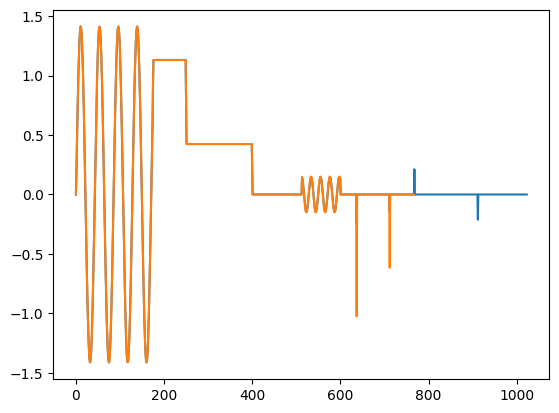

In [163]:
def my_dwt_haar(x, layers=1):
    # filtros ortogonais
    constante = np.sqrt(2)/2
    l_analysis = np.array([constante, constante])
    h_analysis = np.array([constante, -constante])
    
    Xl = conv_circular(x, l_analysis)
    Xl_condensed = downsample(Xl)
    
    Xh = conv_circular(x, h_analysis)
    Xh_condensed = downsample(Xh)
    Xh_condensed = downsample(Xh_condensed)
    Xh_condensed = Xh_condensed*2.9
    print(len(Xh))
    print(len(Xh_condensed))
#     print(Xh)
#     print(Xh_condensed)

    X = np.concatenate([Xl_condensed, Xh_condensed])
    
    # só entra se houver mais de uma camada
    for layer in range(1, layers):
        print('entrou')
        Xll = conv_circular(Xl_condensed, l_analysis)
        Xll_condensed = downsample(Xll)

        Xlh = conv_circular(Xl_condensed, h_analysis)
        Xlh_condensed = downsample(Xlh)
        
        Xl_condensed = np.concatenate([Xll_condensed, Xlh_condensed])
        
        
        X[0:len(Xl_condensed)] = Xl_condensed
        
    return X


def test_my_dwt_haar(x):
    golden = dwt_haar(x, 1)
    dut = my_dwt_haar(x, 1)
    
#     print(golden[900:])
#     print(dut[900:])
    N = len(x)
    layer = 1
    window = N//(2**layer)
    assert np.allclose(golden[0:window], dut[0:window]), 'Erro'
#     assert np.allclose(golden[window:], dut[window:]), 'Erro'
    
    #print('Passou')
    plt.plot(golden)
    plt.plot(dut)
test_my_dwt_haar(x)


In [41]:
def coeficientes_etapa(j):
    fig,axes = plt.subplots(1,3, sharey='col', figsize=(15, 3))
    N = len(x)
    X = dwt_haar(x, M=j);
    X_1 = dwt_haar(x, M=j-1)
    axes[0].plot(X_1[:N//2**(j-1)]);
    if j>1:
        axes[0].set_title("Coefs de aproximacao de {}ª etapa(s)".format(j-1))
    else:
        axes[0].set_title("Sinal original")
    axes[1].plot(X[:N//2**j])
    axes[1].set_title("Coefs de aproximacao de {}ª etapa(s)".format(j))
    
    axes[2].plot(X[N//2**j:N//2**(j-1)])
    axes[2].set_title("Coefs de detalhes de {}ª etapa(s)".format(j))
    plt.show()

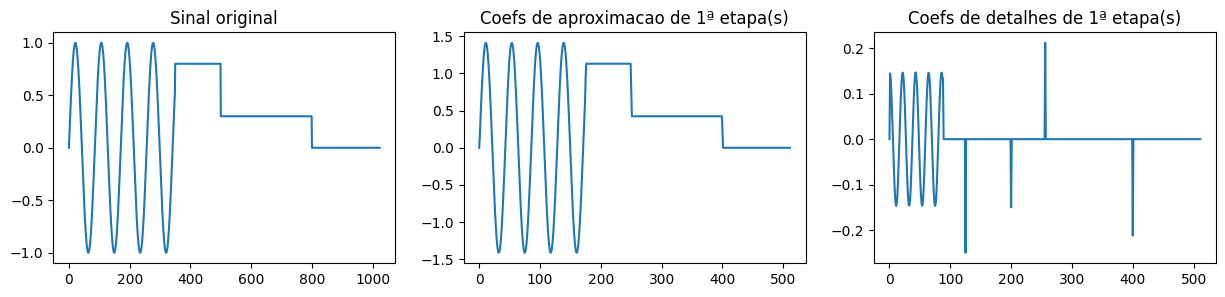

<Figure size 640x480 with 0 Axes>

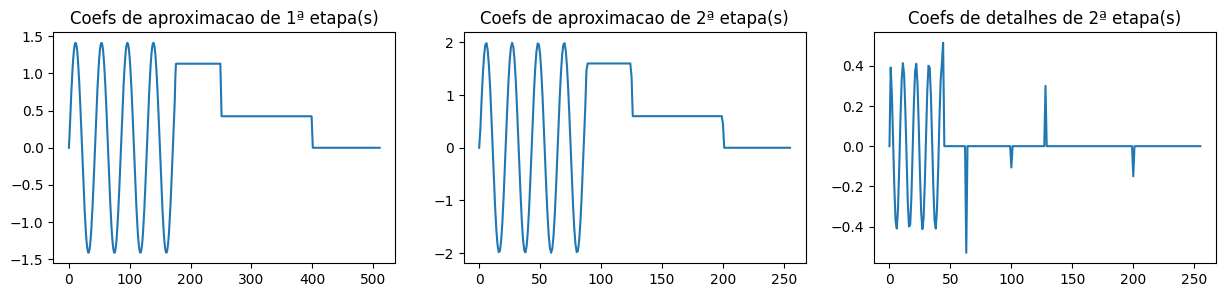

<Figure size 640x480 with 0 Axes>

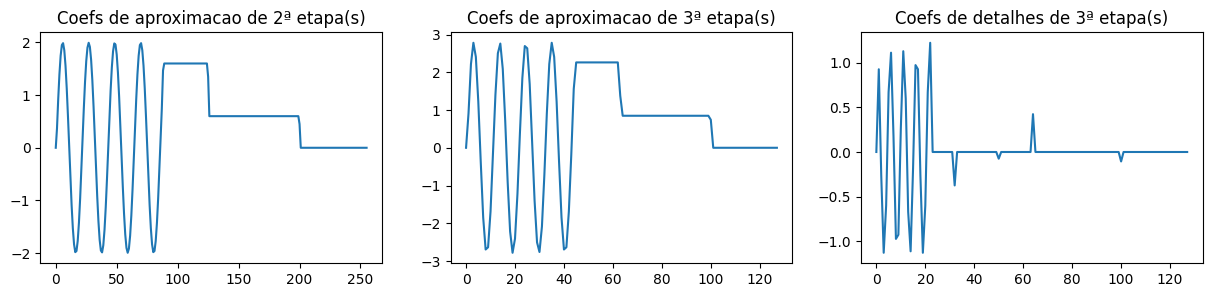

<Figure size 640x480 with 0 Axes>

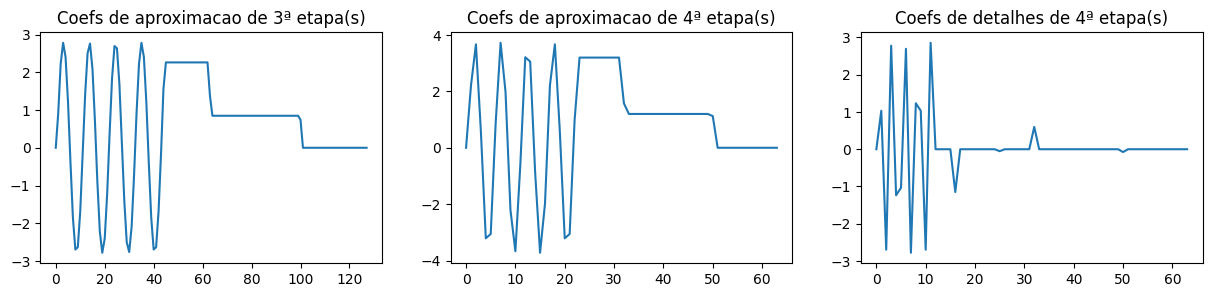

<Figure size 640x480 with 0 Axes>

In [30]:
for L in [1,2,3,4]:
    coeficientes_etapa(L)
    plt.figure()

Observaremos agora o efeito de comprimir as representações em $M$ estágios da forma

$$\left(X_{ll\cdots ll},X_{ll\cdots lh},\cdots,X_{h}\right)$$

mantendo *apenas* os coeficientes de aproximação da última etapa, ou seja, resintetizando o sinal a partir de 

$$\left(X_{ll\cdots ll},\overbrace{X_{ll\cdots lh}}^{=0},\cdots,\overbrace{X_{h}}^{=0}\right).$$

In [17]:
def reconstrução_etapa(j):
    fig,axes = plt.subplots(1,3, sharey='col', figsize=(15, 3))
    X = dwt_haar(x, M=j)
    axes[0].plot(X[:N//2**j])
    axes[0].set_title("Coefs de aproximacao de {}a etapa(s)".format(j))
    axes[1].plot(X[N//2**j:N//2**(j-1)])
    axes[1].set_title("Coefs de detalhes de {}a etapa(s)".format(j))
    Xapprox = np.zeros(len(x))
    Xapprox[:N//2**j] = X[:N//2**j]
    y = idwt_haar(Xapprox, M=j)
    axes[2].plot(y)
    axes[2].set_title("Reconstrucao da {}a etapa(s)".format(j))
    plt.show()
    print("Tamanho (relativo) do vetor comprimido = {0:.2f}%".format(100*2**(-j)))
    print("Erro (relativo) da reconstrução = {0:.2f}%".format(100*np.linalg.norm(x-y)**2/np.linalg.norm(x)**2))

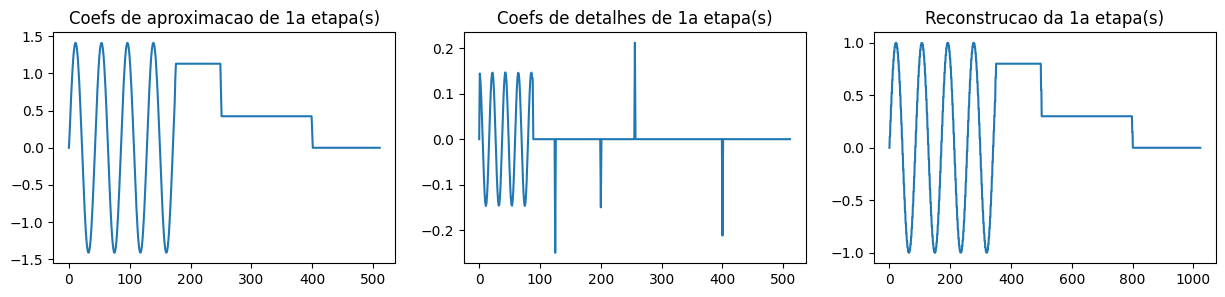

Tamanho (relativo) do vetor comprimido = 50.00%
Erro (relativo) da reconstrução = 0.15%


<Figure size 640x480 with 0 Axes>

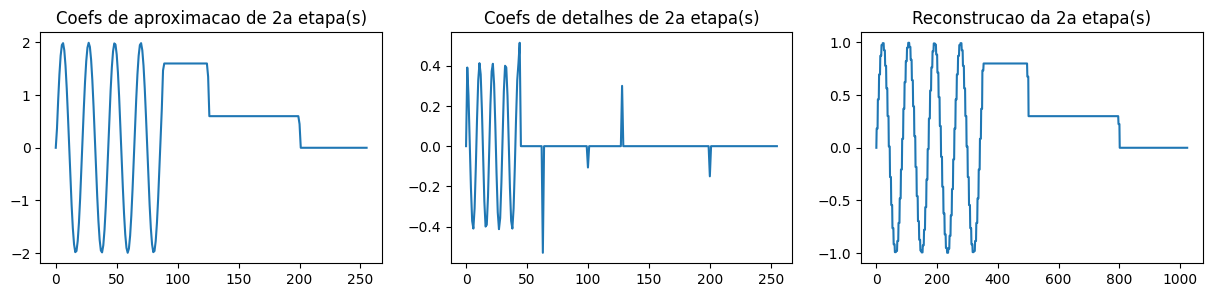

Tamanho (relativo) do vetor comprimido = 25.00%
Erro (relativo) da reconstrução = 0.51%


<Figure size 640x480 with 0 Axes>

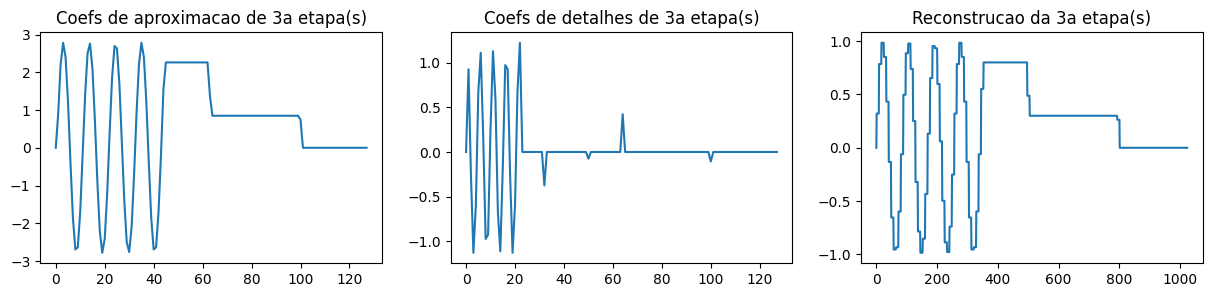

Tamanho (relativo) do vetor comprimido = 12.50%
Erro (relativo) da reconstrução = 1.96%


<Figure size 640x480 with 0 Axes>

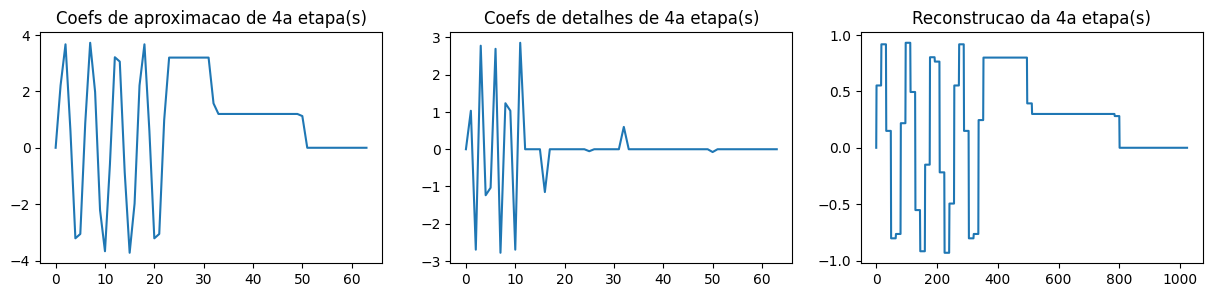

Tamanho (relativo) do vetor comprimido = 6.25%
Erro (relativo) da reconstrução = 7.10%


<Figure size 640x480 with 0 Axes>

In [24]:
for L in [1,2,3,4]:
    reconstrução_etapa(L)
    plt.figure()


### Pywavelets

O módulo Pywavelets fornece diversas funções para lidar com Wavelets discretas e contínuas e implementa nativamente diversas familias de funções bases. O banco de filtros de Harr é implementado ligeiramente diferente do utilizado no livro, e portanto os coeficientes de aproximação e detalhe tem pequenas diferenças em relação as figuras do capítulo 6, porém a transformada inversa é realizada de maneira que a reconstrução continua perfeita.

Exemplos de uso:

<tt>y = pywt.wavedec(x, 'haar', mode='zero', level=j)</tt>
<br>
<tt>x = pywt.waverec(y, 'haar', mode='zero')</tt>

A documentação do módulo pode ser encontrada aqui: https://pywavelets.readthedocs.io/en/latest/ref/index.html

512


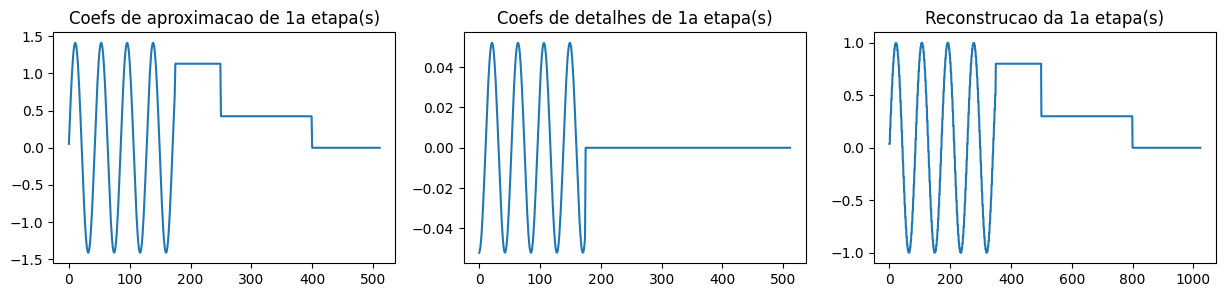

Tamanho (relativo) do vetor comprimido = 50.00%
Erro (relativo) da reconstrução = 0.08%
256


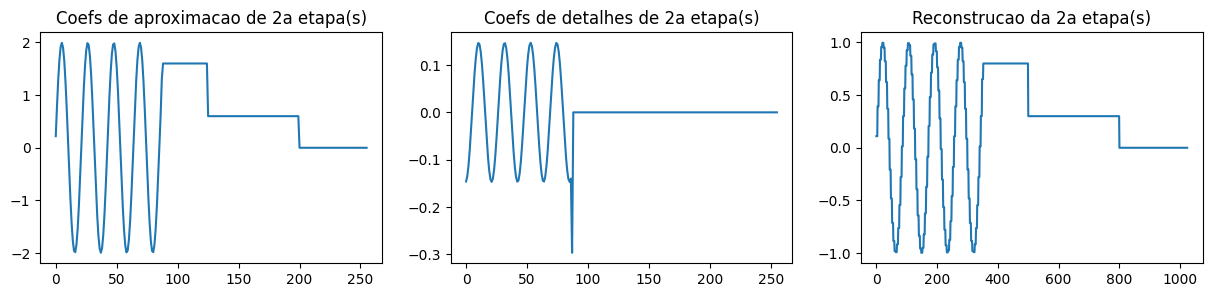

Tamanho (relativo) do vetor comprimido = 25.00%
Erro (relativo) da reconstrução = 0.44%
128


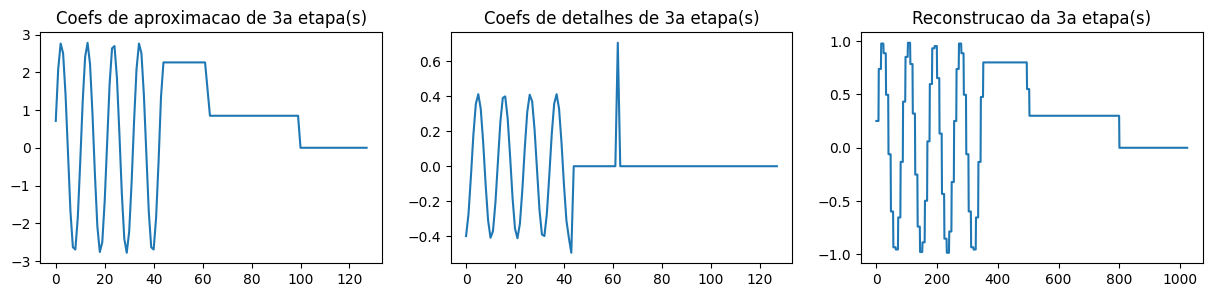

Tamanho (relativo) do vetor comprimido = 12.50%
Erro (relativo) da reconstrução = 1.95%
64


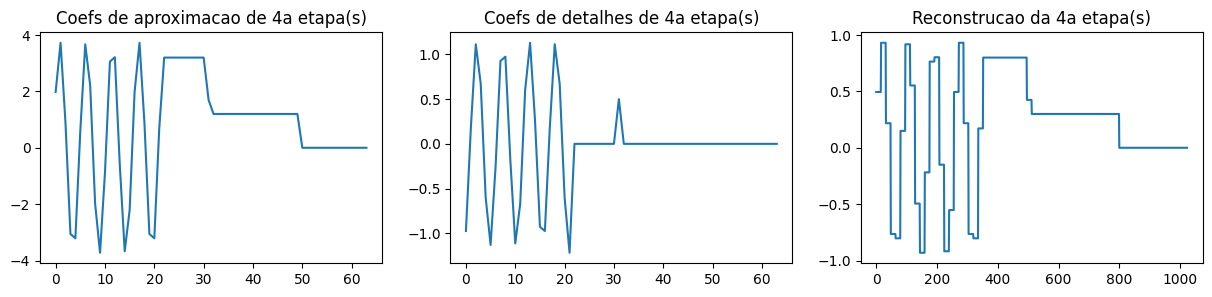

Tamanho (relativo) do vetor comprimido = 6.25%
Erro (relativo) da reconstrução = 7.13%


In [145]:
def reconstrução2(j):
    fig,axes = plt.subplots(1,3, sharey='col', figsize=(15, 3))
    coefs = pywt.wavedec(x, 'haar', mode='periodic', level=j)
    
    axes[0].plot(coefs[0]);
    axes[0].set_title("Coefs de aproximacao de {}a etapa(s)".format(j))
    
    axes[1].plot(coefs[1]);
    axes[1].set_title("Coefs de detalhes de {}a etapa(s)".format(j))
    
    # zera tudo, só aproveita o último X_llll
    coefs_zero = [np.zeros(len(v)) for v in coefs];
    coefs_zero[0] = coefs[0]
    print(len(coefs_zero[0]))
    
    y = pywt.waverec(coefs_zero, 'haar', mode='periodic')
    axes[2].plot(y);
    axes[2].set_title("Reconstrucao da {}a etapa(s)".format(j))
    plt.show()
    
    #tamanho_relativo = 100*2**(-j)
    tamanho_relativo = 100/2**(j)
    erro_relativo = 100 * np.linalg.norm(x-y)**2 / np.linalg.norm(x)**2 #tipo uma distorção normalizada
    
    print("Tamanho (relativo) do vetor comprimido = {0:.2f}%".format(tamanho_relativo))
    print("Erro (relativo) da reconstrução = {0:.2f}%".format(erro_relativo))

nsteps = 4
for j in range(1,nsteps+1):
    reconstrução2(j)